In [1]:
import numpy as np 
import pandas as pd


In [2]:
PREFIX="simba_"
#PREFIX="eyeriss_"

In [3]:
df = pd.read_csv(f"data/{PREFIX}energy_stride.csv", sep=";", header=None)
#df = df.reset_index(drop=True)
df.columns = ["sigma", "timeloop_energy", "timeloop_comp", "timeloop_data", "jirka_comp", "jirka_data"]
df

,sigma,timeloop_energy,timeloop_comp,timeloop_data,jirka_comp,jirka_data
0,1,5.266056e+09,5.966534e+08,4.669402e+09,1063932672,12588032
1,2,1.379803e+09,1.519645e+08,1.227839e+09,270978048,10403584
2,3,6.539798e+08,6.753977e+07,5.864401e+08,120434688,9988864
3,4,3.810949e+08,3.941123e+07,3.416837e+08,70276800,9850688
4,5,2.470448e+08,2.522319e+07,2.218216e+08,44977152,9780992


In [4]:
df = df[["sigma", "timeloop_data"]]
df["sigma_sq"] = df["sigma"]*df["sigma"]
df["sigma_inv"] = 1/df["sigma"]
df["sigma_sq_inv"] = 1/df["sigma_sq"]

/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [5]:
df

,sigma,timeloop_data,sigma_sq,sigma_inv,sigma_sq_inv
0,1,4.669402e+09,1,1.000000,1.000000
1,2,1.227839e+09,4,0.500000,0.250000
2,3,5.864401e+08,9,0.333333,0.111111
3,4,3.416837e+08,16,0.250000,0.062500
4,5,2.218216e+08,25,0.200000,0.040000


# Statistical test using smf.osl

In [6]:
import statsmodels.formula.api as smf


In [7]:
model = smf.ols(formula='timeloop_data ~   sigma_inv + sigma_sq_inv', data=df)
results = model.fit()

In [8]:
results

In [9]:
results.summary()

/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          timeloop_data   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.815e+04
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.13e-05
Time:                        12:45:30   Log-Likelihood:                -84.798
No. Observations:                   5   AIC:                             175.6
Df Residuals:                       2   BIC:                             174.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.187e+06   2.01e+07     -0.208      0.855   -9.09e+07    8.25e+07
sigma_inv     2.789e+08   8.69e+07      3.211      0.085   -9.48e+07    6.53e+08
sigma_sq_inv  4.394e+09   6.98e+07     62.966      0.000    4.09e+09    4.69e+09
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.485
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.419
Skew:                           0.518   Prob(JB):                        0.811
Kurtosis:                       2.031   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(results.pvalues)

Intercept       0.854629
sigma_inv       0.084806
sigma_sq_inv    0.000252
dtype: float64


In [11]:
results.pvalues["sigma_sq_inv"].round(6)

0.000252

In [12]:
results.pvalues[results.pvalues > .05]

Intercept    0.854629
sigma_inv    0.084806
dtype: float64

# Figure

In [13]:
from scipy import stats
m, c, r, p, se = stats.linregress(df["sigma_sq_inv"], df["timeloop_data"])

print(m, c)

df["sq"] = m*df["sigma_sq_inv"]+c
df

4615412860.077049 58403395.95722389


,sigma,timeloop_data,sigma_sq,sigma_inv,sigma_sq_inv,sq
0,1,4.669402e+09,1,1.000000,1.000000,4.673816e+09
1,2,1.227839e+09,4,0.500000,0.250000,1.212257e+09
2,3,5.864401e+08,9,0.333333,0.111111,5.712270e+08
3,4,3.416837e+08,16,0.250000,0.062500,3.468667e+08
4,5,2.218216e+08,25,0.200000,0.040000,2.430199e+08


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

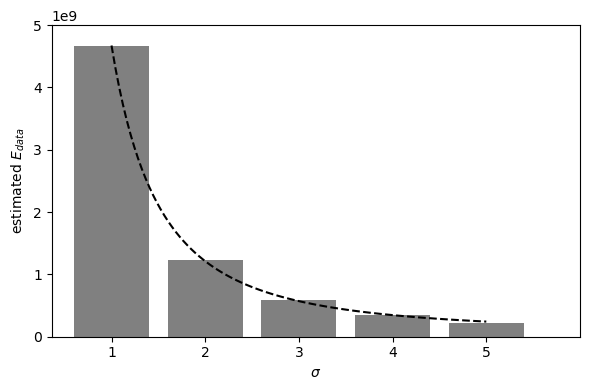

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

dfx = df[["sigma", "timeloop_data", "sq"]]

sns.barplot(data=dfx, x="sigma", y="timeloop_data", color="gray", ax=ax)
#sns.lineplot(data=dfx, x=df.index, y="sq", ls="--", color="black")

#ax2 = ax.twinx()
df_aux = pd.DataFrame()
df_aux["x"] = np.linspace(1, 5, 100)
df_aux["x2"] = 1/df_aux["x"]**2
df_aux["y"] = m*df_aux["x2"]+c
df_aux["x"] = df_aux["x"]-1
df_aux1 = df_aux[["x", "y"]]
sns.lineplot(data=df_aux1, x="x", y="y", ls="--", color="black")

ax.set(xlabel="$\sigma$")
ax.set(ylabel="estimated $E_{data}$")
ax.set(ylim=(0,5e09))
ax.set(xlim=(None,5))
#ax.set_xticks(list(range(56,448,1)));
#ax.set_xticks(range(0, 50, 5))

fig.tight_layout()
fig.savefig(f"{PREFIX}sq_trend_sigma.png", bbox_inches="tight")


In [16]:
df_aux1

,x,y
0,0.000000,4.673816e+09
1,0.040404,4.322298e+09
2,0.080808,4.009461e+09
3,0.121212,3.729831e+09
4,0.161616,3.478869e+09
...,...,...
95,3.838384,2.555594e+08
96,3.878788,2.523074e+08
97,3.919192,2.491352e+08
98,3.959596,2.460402e+08
